Task 1: Data Cleaning and Preprocessing

In [1]:
#Importing pandas library

import pandas as pd

In [2]:
#loading a dataset using pandas

data = pd.read_csv('2) Stock Prices Data Set.csv')
data

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


In [3]:
#Identifying missing values

data.isnull().sum()

,0
symbol,0
date,0
open,11
high,8
low,8
close,0
volume,0


In [4]:
#Filling missing values

data.fillna(method="ffill", inplace=True)

data.isnull().sum()

<ipython-input-4-c92ff58e3246>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="ffill", inplace=True)


,0
symbol,0
date,0
open,0
high,0
low,0
close,0
volume,0


In [5]:
#Removing duplicate rows

data.drop_duplicates(inplace=True)
data

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


In [6]:
#standardize inconsistent date formats

data.date = pd.to_datetime(data.date)
data

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


Task 2: Exploratory Data Analysis (EDA)

In [7]:
#Calculating summary statistics

data1 = data.drop('date', axis=1)

data1.describe()

,open,high,low,close,volume
count,497472.000000,497472.000000,497472.000000,497472.000000,4.974720e+05
mean,86.351835,87.131986,85.551898,86.369082,4.253611e+06
std,101.470449,102.311361,100.570269,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.350000,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


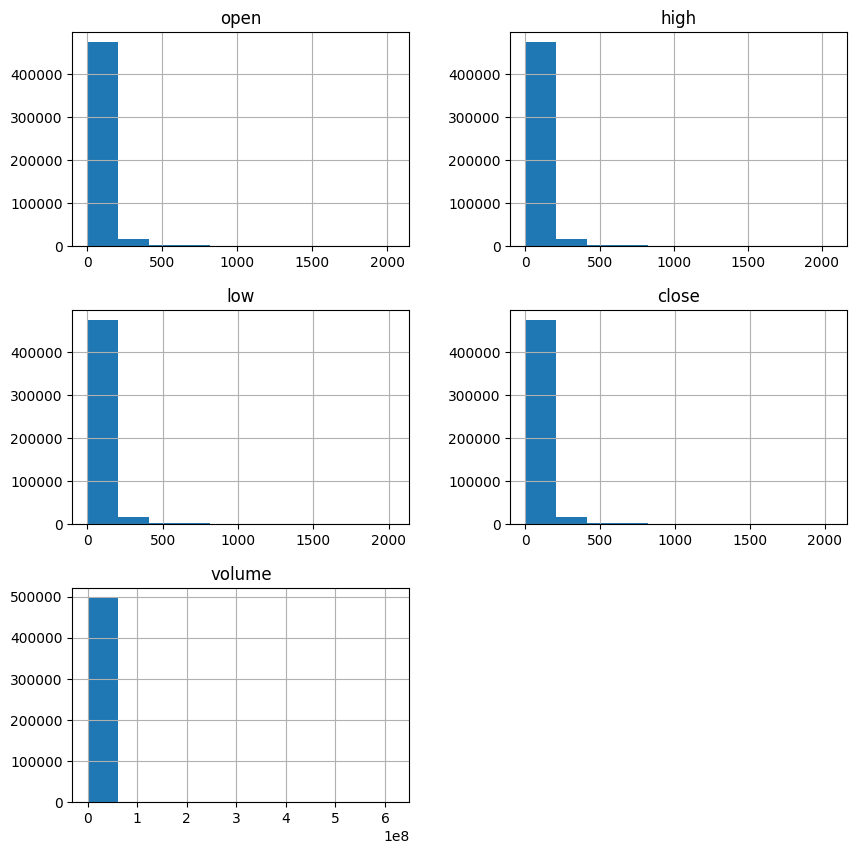

In [8]:
#Visualizing data distributions using histograms

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data1.hist(figsize=(10, 10))
plt.show()

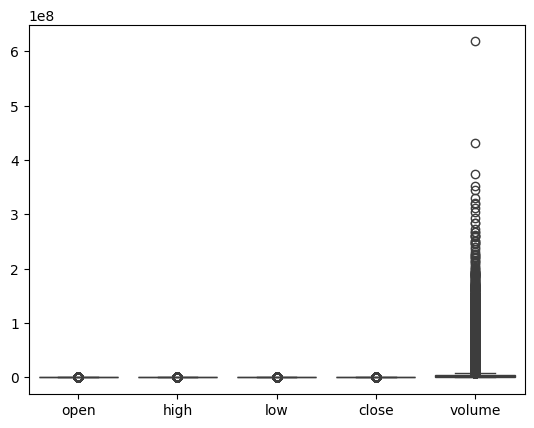

In [9]:
#Box plots

sns.boxplot(data=data1)
plt.show()

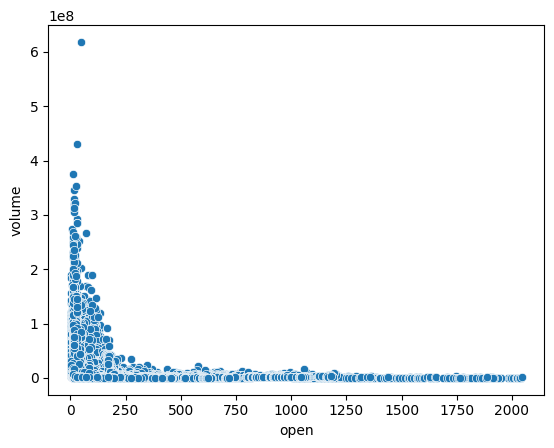

In [10]:
#Scatter plots

sns.scatterplot(x='open', y='volume', data=data)
plt.show()

In [11]:
#correlations between numerical features

numerical_data = data1.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
correlation_matrix

,open,high,low,close,volume
open,1.000000,0.999937,0.999924,0.999852,-0.148721
high,0.999937,1.000000,0.999905,0.999917,-0.148341
low,0.999924,0.999905,1.000000,0.999921,-0.149281
close,0.999852,0.999917,0.999921,1.000000,-0.148839
volume,-0.148721,-0.148341,-0.149281,-0.148839,1.000000


Task 3: Basic Data Visualization

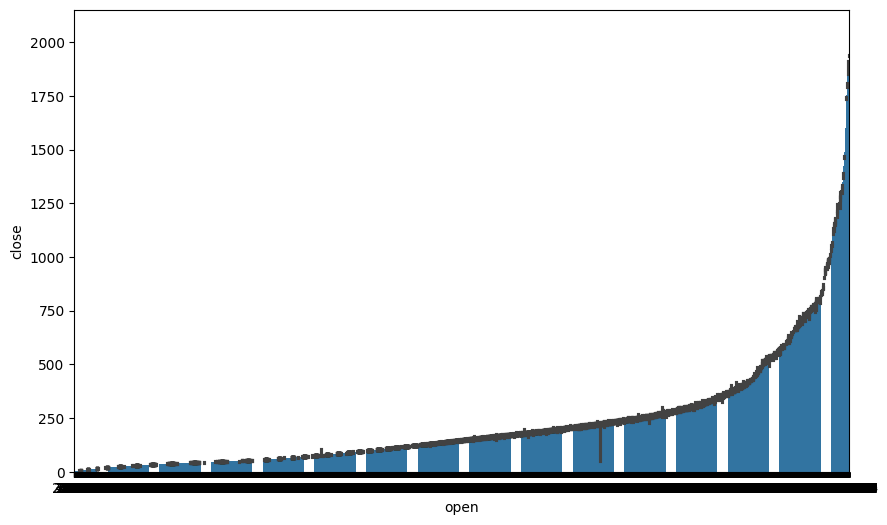

In [12]:
#Create bar plots, line charts, and scatter plots

import matplotlib.pyplot as plt
import seaborn as sns

#Bar plots
plt.figure(figsize=(10, 6))
sns.barplot(x='open', y='close', data=data)
plt.show()

<Axes: xlabel='open', ylabel='close'>

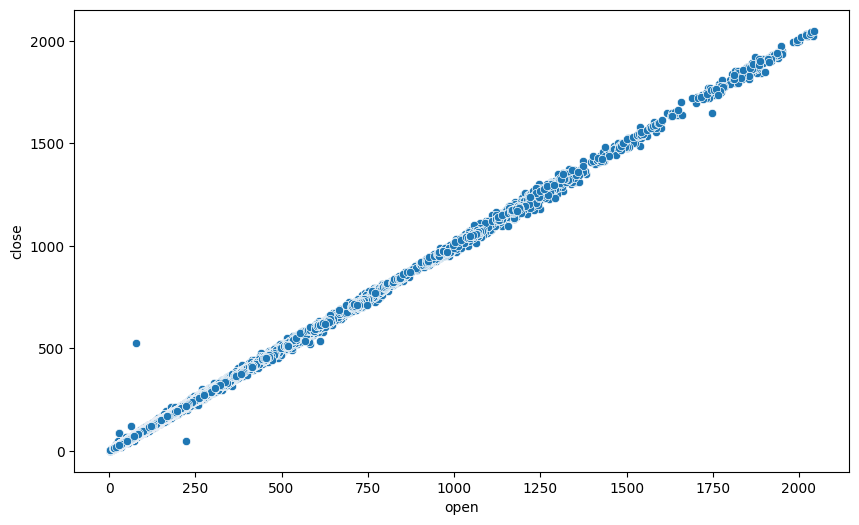

In [13]:
#Scatter plots

plt.figure(figsize=(10, 6))
sns.scatterplot(x='open', y='close', data=data)

Text(0, 0.5, 'close')

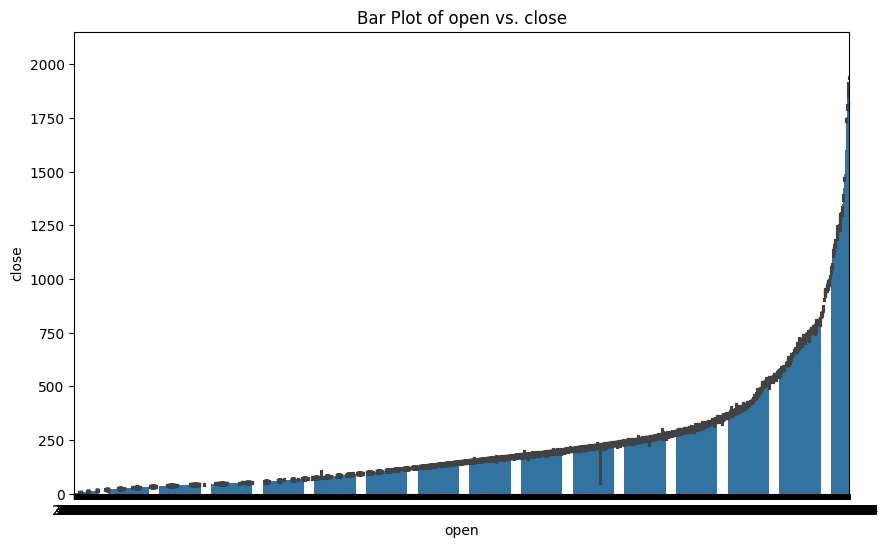

In [14]:
#Customizing plot labels, titles, and legends

plt.figure(figsize=(10, 6))
sns.barplot(x='open', y='close', data=data)
plt.title('Bar Plot of open vs. close')
plt.xlabel('open')
plt.ylabel('close')